# NOTEBOOK 1: DATA EXPLORATION & CLEANING
## Complete data loading, cleaning, and feature mapping for nonlinear modeling

In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

print("📊 CEMENT PLANT DATA EXPLORATION & CLEANING FOR NONLINEAR MODELING")
print("=" * 65)

📊 CEMENT PLANT DATA EXPLORATION & CLEANING FOR NONLINEAR MODELING


In [3]:
# Cell 2: Load and Examine Raw Data
df = pd.read_csv('Cement_plant_data.csv')

print(f"📈 Raw Dataset Info:")
print(f" Shape: {df.shape}")
print(f" Columns: {list(df.columns)}")
print(f"\n📊 First 5 rows:")
print(df.head())

print(f"\n🔍 Data Types:")
print(df.dtypes)

📈 Raw Dataset Info:
 Shape: (4320, 17)
 Columns: ['Timestamp', 'Feed Size (mm)', 'Product Size (mm)', 'Mill Power 1 (kW)', 'Mill Inlet Temp (°C)', 'Blending Efficiency (%)', 'C5 Temp (°C)', 'Heat Recovery Eff (%)', 'Fuel Flow Rate (t/h)', 'Primary Fuel Flow (t/h)', 'Secondary Air Temp (°C)', 'Kiln Drive Power (kW)', 'Clinker Inlet Temp (°C)', 'Cooling Air Flow (m³/min)', 'Mill Power 2 (kW)', 'Packing Rate (bags/min)', 'Target_eff']

📊 First 5 rows:
             Timestamp  Feed Size (mm)  Product Size (mm)  Mill Power 1 (kW)  \
0  2025-04-01 00:00:00            1002               22.0               1806   
1  2025-04-01 01:00:00            1001               22.0               1803   
2  2025-04-01 02:00:00            1004               22.1               1808   
3  2025-04-01 03:00:00            1010               22.0               1809   
4  2025-04-01 04:00:00            1009               22.0               1810   

   Mill Inlet Temp (°C)  Blending Efficiency (%)  C5 Temp (°C)  \


In [4]:
# Cell 3: Feature Mapping to F1-F15
# Get all columns except Timestamp and target
all_cols = df.columns.tolist()
exclude_cols = ['Timestamp', 'Target_eff']
feature_columns = [col for col in all_cols if col not in exclude_cols]

# Take first 15 features and map to F1-F15
feature_columns = feature_columns[:15]
feature_mapping = {}
for i, col in enumerate(feature_columns, 1):
    feature_mapping[f'F{i}'] = col

print(f"\n🗺️ Feature Mapping (F1-F15):")
for f_name, original_name in feature_mapping.items():
    print(f" {f_name}: {original_name}")

# Create clean dataframe
df_clean = pd.DataFrame()
for f_name, original_name in feature_mapping.items():
    df_clean[f_name] = df[original_name]

# Add target variable
df_clean['y'] = df['Target_eff']

print(f"\n📋 Clean Dataset Shape: {df_clean.shape}")
print(f"\n📊 Clean Dataset Preview:")
print(df_clean.head())


🗺️ Feature Mapping (F1-F15):
 F1: Feed Size (mm)
 F2: Product Size (mm)
 F3: Mill Power 1 (kW)
 F4: Mill Inlet Temp (°C)
 F5: Blending Efficiency (%)
 F6: C5 Temp (°C)
 F7: Heat Recovery Eff (%)
 F8: Fuel Flow Rate (t/h)
 F9: Primary Fuel Flow (t/h)
 F10: Secondary Air Temp (°C)
 F11: Kiln Drive Power (kW)
 F12: Clinker Inlet Temp (°C)
 F13: Cooling Air Flow (m³/min)
 F14: Mill Power 2 (kW)
 F15: Packing Rate (bags/min)

📋 Clean Dataset Shape: (4320, 16)

📊 Clean Dataset Preview:
     F1    F2    F3   F4    F5   F6    F7   F8    F9  F10   F11   F12  F13  \
0  1002  22.0  1806  100  90.0  875  87.5  5.0  10.0  950  1000  1301  502   
1  1001  22.0  1803  101  90.1  875  87.6  5.0  10.0  951  1005  1299  504   
2  1004  22.1  1808  100  90.1  875  87.5  5.0   9.9  953  1011  1301  504   
3  1010  22.0  1809  101  90.0  874  87.7  5.0   9.8  950  1010  1302  504   
4  1009  22.0  1810  101  90.1  875  87.7  5.0   9.7  954  1014  1301  502   

    F14   F15     y  
0  2245  12.0  77.0  
1

In [5]:
# Cell 4: Data Quality Check
print(f"\n🔍 DATA QUALITY CHECK:")
print(f" Missing Values: {df_clean.isnull().sum().sum()}")
print(f" Duplicate Rows: {df_clean.duplicated().sum()}")
print(f" Data Types:")
for col in df_clean.columns:
    print(f"  {col}: {df_clean[col].dtype}")

print(f"\n📊 Basic Statistics:")
print(df_clean.describe())


🔍 DATA QUALITY CHECK:
 Missing Values: 0
 Duplicate Rows: 0
 Data Types:
  F1: int64
  F2: float64
  F3: int64
  F4: int64
  F5: float64
  F6: int64
  F7: float64
  F8: float64
  F9: float64
  F10: int64
  F11: int64
  F12: int64
  F13: int64
  F14: int64
  F15: float64
  y: float64

📊 Basic Statistics:
                F1           F2           F3           F4           F5  \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean   1096.618981    20.399792  1745.182407   115.159028    91.960278   
std      76.326911     0.808543    79.794626     4.367992     1.383480   
min     914.000000    19.000000  1600.000000    96.000000    88.400000   
25%    1030.000000    19.700000  1680.000000   113.000000    90.900000   
50%    1123.000000    20.300000  1730.000000   117.000000    92.000000   
75%    1159.000000    21.100000  1818.000000   118.000000    93.100000   
max    1200.000000    22.200000  1922.000000   120.000000    95.000000   

                F6         

In [6]:
# Cell 5: Target Variable Analysis
print(f"\n📈 TARGET VARIABLE ANALYSIS (y):")
print(f" Mean: {df_clean['y'].mean():.2f}")
print(f" Median: {df_clean['y'].median():.2f}")
print(f" Min: {df_clean['y'].min():.2f}")
print(f" Max: {df_clean['y'].max():.2f}")
print(f" Std: {df_clean['y'].std():.2f}")
print(f" Range: {df_clean['y'].max() - df_clean['y'].min():.2f}")

# Check if we can achieve 77% target
target_77 = 77.0
current_max = df_clean['y'].max()
samples_above_77 = (df_clean['y'] >= target_77).sum()

print(f"\n🎯 TARGET ACHIEVEMENT ANALYSIS:")
print(f" Target: ≥{target_77}%")
print(f" Current Max: {current_max:.2f}%")
print(f" Samples ≥77%: {samples_above_77} out of {len(df_clean)}")

if current_max >= target_77:
    print(f" ✅ Target {target_77}% is historically achievable")
    print(f" 🎯 Goal: Find consistent parameter combination for {target_77}%+")
else:
    print(f" ⚠️ Target {target_77}% exceeds historical maximum")
    print(f" 🎯 Goal: Use nonlinear model to extrapolate beyond historical performance")


📈 TARGET VARIABLE ANALYSIS (y):
 Mean: 61.70
 Median: 60.60
 Min: 55.00
 Max: 77.00
 Std: 4.15
 Range: 22.00

🎯 TARGET ACHIEVEMENT ANALYSIS:
 Target: ≥77.0%
 Current Max: 77.00%
 Samples ≥77%: 1 out of 4320
 ✅ Target 77.0% is historically achievable
 🎯 Goal: Find consistent parameter combination for 77.0%+


In [7]:
# Cell 6: Enhanced Correlation Analysis (Pearson & Spearman)
print(f"\n📊 CORRELATION ANALYSIS (Linear vs Monotonic):")
print(f"{'Feature':<8} {'Pearson':<10} {'p-value':<10} {'Spearman':<10} {'p-value':<10} {'Nonlinear?'}")
print("-" * 75)

correlations_data = []
for i in range(1, 16):
    feature = f'F{i}'
    
    # Pearson (linear correlation)
    pearson_corr, pearson_p = pearsonr(df_clean[feature], df_clean['y'])
    
    # Spearman (monotonic correlation)
    spearman_corr, spearman_p = spearmanr(df_clean[feature], df_clean['y'])
    
    # Check for potential nonlinearity
    nonlinear_indicator = "Likely" if abs(spearman_corr) > abs(pearson_corr) + 0.1 else "Unlikely"
    
    correlations_data.append({
        'feature': feature,
        'pearson': pearson_corr,
        'pearson_p': pearson_p,
        'spearman': spearman_corr,
        'spearman_p': spearman_p,
        'nonlinear': nonlinear_indicator
    })
    
    print(f"{feature:<8} {pearson_corr:+.3f}     {pearson_p:.3g}      {spearman_corr:+.3f}      {spearman_p:.3g}      {nonlinear_indicator}")

# Identify potentially nonlinear features
nonlinear_features = [item['feature'] for item in correlations_data if item['nonlinear'] == 'Likely']
print(f"\n🔄 Features with potential nonlinear relationships: {len(nonlinear_features)}")
if nonlinear_features:
    print(f" {', '.join(nonlinear_features)}")


📊 CORRELATION ANALYSIS (Linear vs Monotonic):
Feature  Pearson    p-value    Spearman   p-value    Nonlinear?
---------------------------------------------------------------------------
F1       -0.741     0      -0.710      0      Unlikely
F2       +0.702     0      +0.774      0      Unlikely
F3       +0.673     0      +0.698      0      Unlikely
F4       -0.408     4.92e-173      -0.033      0.0313      Unlikely
F5       -0.368     1.16e-138      -0.492      1.14e-262      Likely
F6       +0.761     0      +0.468      3.74e-234      Unlikely
F7       +0.356     1.97e-129      +0.300      2.58e-90      Unlikely
F8       +0.443     2.83e-207      +0.563      0      Likely
F9       +0.315     2.17e-100      -0.014      0.363      Unlikely
F10      -0.818     0      -0.570      0      Unlikely
F11      -0.395     6.26e-161      -0.709      0      Likely
F12      -0.412     1.22e-176      -0.503      2.74e-276      Unlikely
F13      -0.287     8.3e-83      -0.452      4.41e-216      Lik

In [8]:
# Cell 7: Feature Bounds Analysis
print(f"\n📊 FEATURE BOUNDS (for constraint setting):")
print(f"{'Feature':<8} {'Min':<12} {'Max':<12} {'Range':<12} {'Mean':<12}")
print("-" * 60)

feature_bounds = {}
for i in range(1, 16):
    col = f'F{i}'
    min_val = float(df_clean[col].min())
    max_val = float(df_clean[col].max())
    range_val = float(max_val - min_val)
    mean_val = float(df_clean[col].mean())
    
    feature_bounds[col] = {
        'min': min_val,
        'max': max_val,
        'range': range_val,
        'mean': mean_val
    }
    
    print(f"{col:<8} {min_val:<12.2f} {max_val:<12.2f} {range_val:<12.2f} {mean_val:<12.2f}")

# Save bounds for next notebooks
import json
with open('feature_bounds.json', 'w') as f:
    json.dump(feature_bounds, f, indent=2)

print(f"\n✅ Feature bounds saved to feature_bounds.json")


📊 FEATURE BOUNDS (for constraint setting):
Feature  Min          Max          Range        Mean        
------------------------------------------------------------
F1       914.00       1200.00      286.00       1096.62     
F2       19.00        22.20        3.20         20.40       
F3       1600.00      1922.00      322.00       1745.18     
F4       96.00        120.00       24.00        115.16      
F5       88.40        95.00        6.60         91.96       
F6       850.00       891.00       41.00        861.55      
F7       85.00        90.00        5.00         87.45       
F8       4.00         5.90         1.90         4.94        
F9       8.00         10.00        2.00         8.72        
F10      908.00       1100.00      192.00       1048.72     
F11      800.00       1200.00      400.00       1073.60     
F12      1250.00      1400.00      150.00       1345.74     
F13      437.00       600.00       163.00       529.94      
F14      2052.00      2500.00      448.00

In [9]:
# Cell 8: Nonlinearity Detection via Residual Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print(f"\n🔍 NONLINEARITY DETECTION (Residual Analysis):")

# Fit simple linear model to each feature
nonlinearity_scores = []

for i in range(1, 16):
    feature = f'F{i}'
    X_single = df_clean[[feature]]
    y = df_clean['y']
    
    # Fit linear model
    lr = LinearRegression()
    lr.fit(X_single, y)
    y_pred = lr.predict(X_single)
    
    # Calculate R² and residual patterns
    r2 = r2_score(y, y_pred)
    residuals = y - y_pred
    
    # Simple nonlinearity indicator: low R² suggests nonlinear relationship
    nonlinearity_score = 1 - r2  # Higher score = more nonlinear
    nonlinearity_scores.append((feature, r2, nonlinearity_score))

# Sort by nonlinearity score (descending)
nonlinearity_scores.sort(key=lambda x: x[2], reverse=True)

print(f"{'Feature':<8} {'Linear R²':<10} {'Nonlinear Score':<15} {'Assessment'}")
print("-" * 50)

highly_nonlinear = []
for feature, r2, nl_score in nonlinearity_scores:
    if r2 < 0.3:
        assessment = "Highly Nonlinear"
        highly_nonlinear.append(feature)
    elif r2 < 0.6:
        assessment = "Moderately Nonlinear"
    else:
        assessment = "Mostly Linear"
    
    print(f"{feature:<8} {r2:<10.3f} {nl_score:<15.3f} {assessment}")

print(f"\n🔄 Summary: {len(highly_nonlinear)} features show strong nonlinear behavior")
print(f"   This justifies using nonlinear models for cement plant efficiency prediction")


🔍 NONLINEARITY DETECTION (Residual Analysis):
Feature  Linear R²  Nonlinear Score Assessment
--------------------------------------------------
F14      0.044      0.956           Highly Nonlinear
F13      0.082      0.918           Highly Nonlinear
F9       0.099      0.901           Highly Nonlinear
F7       0.127      0.873           Highly Nonlinear
F5       0.135      0.865           Highly Nonlinear
F11      0.156      0.844           Highly Nonlinear
F4       0.167      0.833           Highly Nonlinear
F12      0.170      0.830           Highly Nonlinear
F8       0.196      0.804           Highly Nonlinear
F3       0.453      0.547           Moderately Nonlinear
F15      0.485      0.515           Moderately Nonlinear
F2       0.493      0.507           Moderately Nonlinear
F1       0.550      0.450           Moderately Nonlinear
F6       0.580      0.420           Moderately Nonlinear
F10      0.669      0.331           Mostly Linear

🔄 Summary: 9 features show strong nonlinea

In [10]:
# Cell 9: Save Cleaned Dataset
# Save the cleaned dataset for model training
df_clean.to_csv('cleaned_cement_data.csv', index=False)

print(f"\n💾 CLEANED DATA SAVED:")
print(f" ✅ cleaned_cement_data.csv created")
print(f" ✅ Contains {df_clean.shape[0]} samples")
print(f" ✅ Contains {df_clean.shape[1]-1} features (F1-F15) + target (y)")
print(f" ✅ Feature bounds saved for nonlinear optimization")

print(f"\n🔜 NEXT STEPS:")
print(f" 1. Run 02_nonlinear_model_training.ipynb to find best nonlinear model")
print(f" 2. Run 03_nonlinear_optimization.ipynb to find optimal values for y ≥ 77%")

print(f"\n✅ DATA EXPLORATION COMPLETE!")
print(f"   Ready for nonlinear modeling of cement plant efficiency")


💾 CLEANED DATA SAVED:
 ✅ cleaned_cement_data.csv created
 ✅ Contains 4320 samples
 ✅ Contains 15 features (F1-F15) + target (y)
 ✅ Feature bounds saved for nonlinear optimization

🔜 NEXT STEPS:
 1. Run 02_nonlinear_model_training.ipynb to find best nonlinear model
 2. Run 03_nonlinear_optimization.ipynb to find optimal values for y ≥ 77%

✅ DATA EXPLORATION COMPLETE!
   Ready for nonlinear modeling of cement plant efficiency


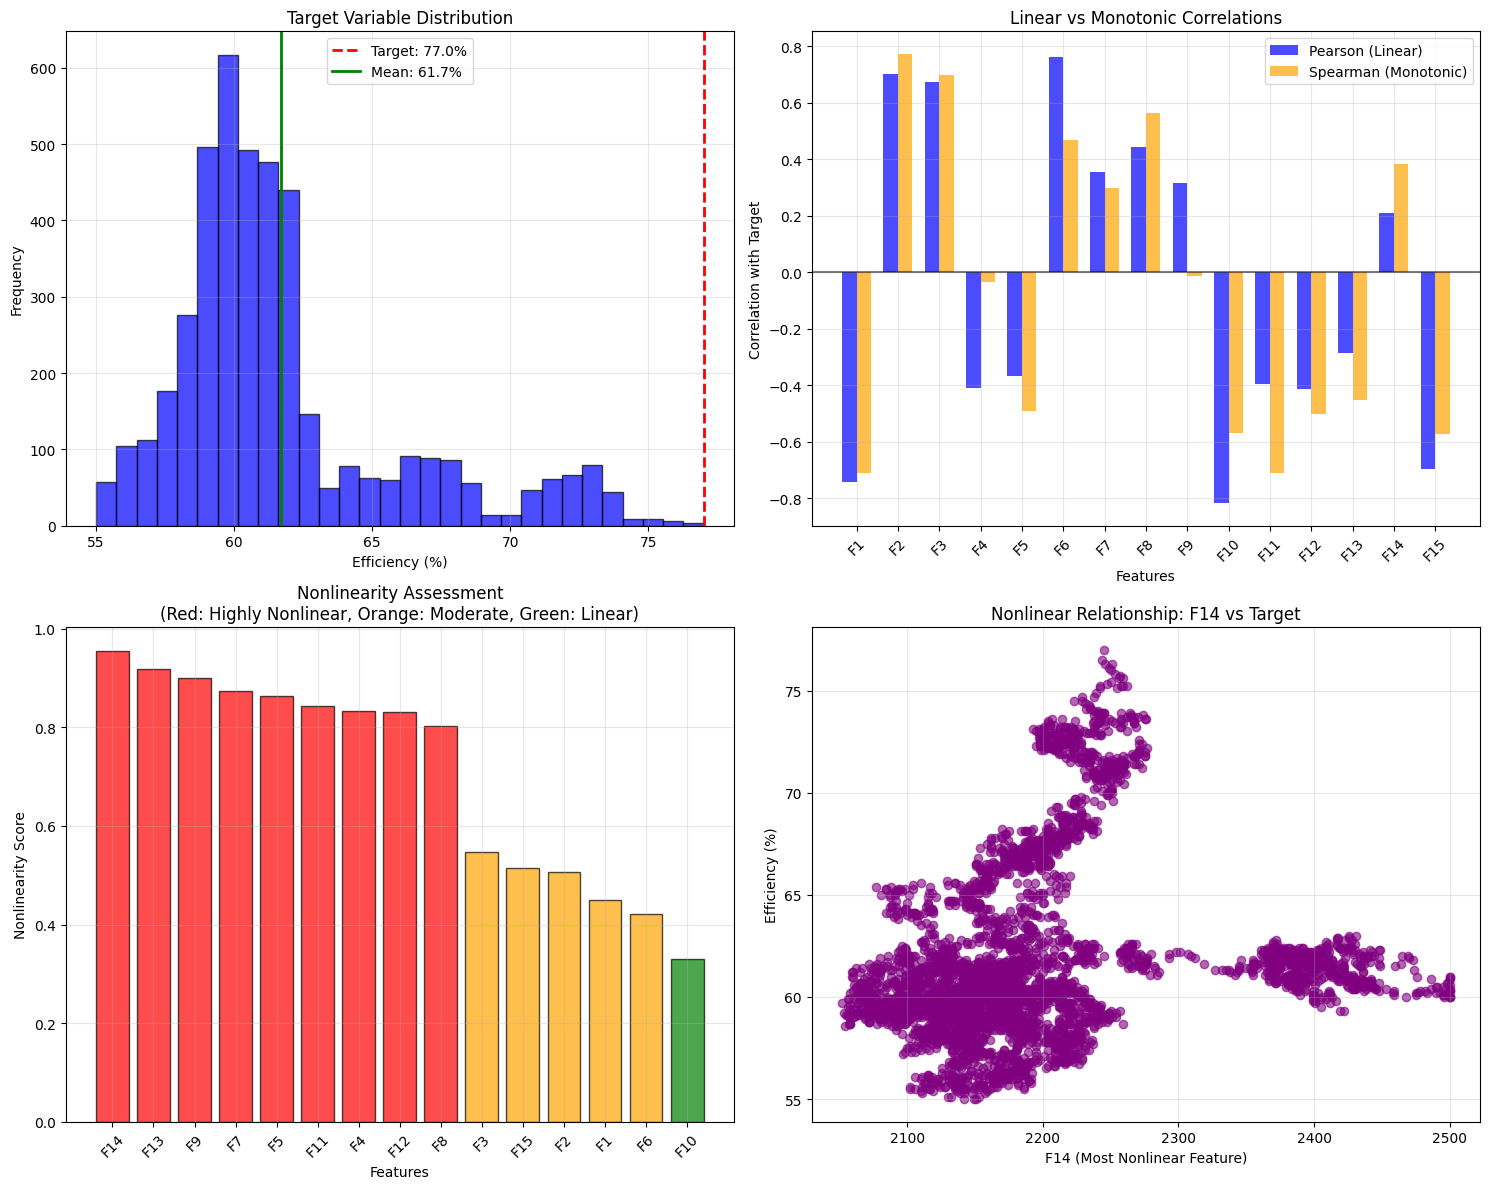


📊 Enhanced visualization created successfully
   Clearly shows nonlinear patterns in cement plant data


In [11]:
# Cell 10: Enhanced Visualization
try:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Target distribution
    ax1.hist(df_clean['y'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax1.axvline(x=target_77, color='red', linestyle='--', linewidth=2, label=f'Target: {target_77}%')
    ax1.axvline(x=df_clean['y'].mean(), color='green', linestyle='-', linewidth=2, label=f'Mean: {df_clean["y"].mean():.1f}%')
    ax1.set_xlabel('Efficiency (%)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Target Variable Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Feature correlations comparison
    features = [f'F{i}' for i in range(1, 16)]
    pearson_corrs = [item['pearson'] for item in correlations_data]
    spearman_corrs = [item['spearman'] for item in correlations_data]
    
    x = np.arange(len(features))
    width = 0.35
    
    ax2.bar(x - width/2, pearson_corrs, width, label='Pearson (Linear)', alpha=0.7, color='blue')
    ax2.bar(x + width/2, spearman_corrs, width, label='Spearman (Monotonic)', alpha=0.7, color='orange')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Correlation with Target')
    ax2.set_title('Linear vs Monotonic Correlations')
    ax2.set_xticks(x)
    ax2.set_xticklabels(features, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Nonlinearity scores
    nl_features = [item[0] for item in nonlinearity_scores]
    nl_scores = [item[2] for item in nonlinearity_scores]
    
    colors = ['red' if score > 0.7 else 'orange' if score > 0.4 else 'green' for score in nl_scores]
    ax3.bar(nl_features, nl_scores, color=colors, alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Features')
    ax3.set_ylabel('Nonlinearity Score')
    ax3.set_title('Nonlinearity Assessment\n(Red: Highly Nonlinear, Orange: Moderate, Green: Linear)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 4. Sample feature vs target scatter (most nonlinear feature)
    most_nonlinear_feature = nonlinearity_scores[0][0]
    ax4.scatter(df_clean[most_nonlinear_feature], df_clean['y'], alpha=0.6, color='purple')
    ax4.set_xlabel(f'{most_nonlinear_feature} (Most Nonlinear Feature)')
    ax4.set_ylabel('Efficiency (%)')
    ax4.set_title(f'Nonlinear Relationship: {most_nonlinear_feature} vs Target')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Enhanced visualization created successfully")
    print(f"   Clearly shows nonlinear patterns in cement plant data")
    
except Exception as e:
    print(f"\n⚠️ Visualization error (non-critical): {e}")
    print(f"Data exploration completed without visualization")